Notation:

- $nr$ = number of rooms
- $nc$ = number of (place) cells
- $A$ = Atlas, $A[r, c]$ encodes the ROOM-position of PC $c$ in room $r$.
- $A'$ = reverse atlas, $A'[r, c]$ encodes the PC-position of ROOM-cell $c$ in room $r$.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

def create_atlas(nr, nc, diam=1.0):

    A = np.zeros((nr,nc)).astype(int)
    A_inv = np.zeros((nr,nc)).astype(int)


    A[0] = np.arange(nc)
    A_inv[0] = np.arange(nc)
    for r in range(1,nr):
        perm = np.random.permutation(nc)
        A[r] =   perm              # Mapping PC's to Room indices
        A_inv[r] = np.argsort(perm) # Mapping from Room indices to PC's
        
    return A, A_inv


def bump(mu, n, sigma=0.1, diam=1.):
    """
    Gaussian bump...
    """
    x = np.linspace(0,diam,num=n) - mu
    a = 1./(sigma*np.sqrt(2*np.pi))
    c = sigma
    y = np.exp( - a*x**2/(2*c**2))
    return y

def convert_to_room_coordinates(z, P):
    nr, nc = P.shape
    Z = np.zeros((nr,nc))
    for i in range(nr):
        Z[i] = z[P[i]]
        
    return Z

def place_code(x, room, atlas):
    
    z = bump(x, nc)
    return z[atlas[room]]



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


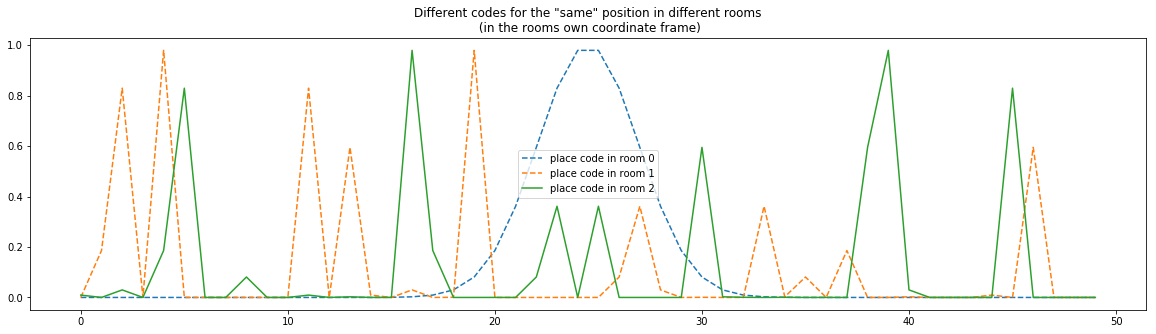

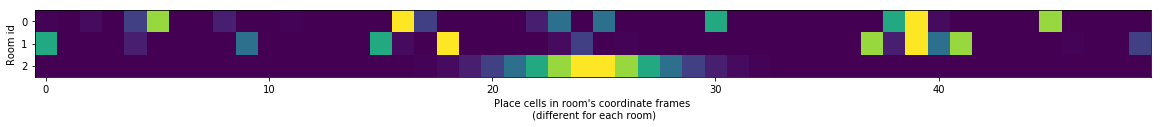

In [10]:

nr   = 3
nc   = 50
diam = 1.

A, A_inv = create_atlas(nr, nc, diam)


plt.figure(figsize=(20,5))
plt.title("Different codes for the \"same\" position in different rooms\n (in the rooms own coordinate frame)")



plt.plot(place_code(x=0.5, room=0, atlas=A), linestyle="--", label="place code in room 0")
plt.plot(place_code(x=0.5, room=1, atlas=A), linestyle="--", label="place code in room 1")
z = place_code(x=0.5, room=2, atlas=A)
plt.plot(z, linestyle="-", label="place code in room 2")
plt.legend()
plt.show()


plt.figure(figsize=(20,5))
plt.imshow(convert_to_room_coordinates(z, A_inv))
plt.yticks(range(nr));
plt.ylabel("Room id");
plt.xlabel("Place cells in room's coordinate frames\n (different for each room)");


